In [121]:
from environment import Environment
import matplotlib.pyplot as plt
import math
import numpy as np
from game import SumUnanimityGames, GlobalFeatureImportance, LocalFeatureImportance
from plot import plot

In [122]:
from algorithms.halfbus import HalfBUS
from algorithms.ApproShapley import ApproShapley
from algorithms.BUS import BUS
from algorithms.HybridApproBUS import SmartHybridApproBUS
from algorithms.SVARM import SVARM, StratSVARM
from algorithms.ShapleySort import ShapleySort

In [123]:
n=15
k=6
budget=1500
rounds=500
step_interval=100
metric = "ratio"
env = Environment(n=n, budget=budget, metric=metric)
results = []

In [124]:
filepath = "datasets/Global feature importance/Bike sharing regression random forest.csv"
game = GlobalFeatureImportance(filepath=filepath, num_players=n, use_cached=True)
# game = SumUnanimityGames()

[    0.         33408.27830548 33408.27830548 ... 42740.68855548
 42740.68855548 42734.39162367]
[ 6690.03819562  6690.03819562  2158.99779937  3901.9940899
  2393.99026768    58.9700947    475.72482757   674.21026368
  1000.65167219  2213.80082438  1700.78973444  -253.81352605
 -1068.69761407  5445.85805931 10651.83873932] 42734.391623665346


In [125]:
results += [("ApproShapley(optimized)", env.evaluate(game, ApproShapley(optimize=True), k, step_interval, rounds))]

In [126]:
results += [("SVARM", env.evaluate(game, SVARM(), k, step_interval, rounds))]

In [127]:
results += [("StratSVARM", env.evaluate(game, StratSVARM(start_exact=True), k, step_interval, rounds))]

In [128]:
results += [("BUS", env.evaluate(game, BUS(), k, step_interval, rounds))]

In [129]:
results += [("SmartHybridApproBUS(switch=10)", env.evaluate(game, SmartHybridApproBUS(switch=10), k, step_interval, rounds))]

In [130]:
results += [("HalfBUS", env.evaluate(game, HalfBUS(focus=n), k, step_interval, rounds))]

In [131]:
results += [("ShapleySort", env.evaluate(game, ShapleySort(), k, step_interval, rounds))]

In [132]:
# results += [("SIRHalfBUS", env.evaluate(game, SIRHalfBUS(), k, step_interval, rounds))]

In [133]:
plot(results, step_interval=step_interval, types=["topk", "mse"], metric=metric, save=True, filepath=f"results/{game.__class__.__name__}({filepath.split('/')[-1]})_n={n}_k={k}_T={budget}_r={rounds}_{metric}.pdf")

In [134]:
np.isin([[1,2,3],[3,4,5]], [2,3]).sum(axis=1)

array([2, 1])

In [135]:
pre_samples = 10

In [136]:
lengths = np.random.randint(n+1, size=(pre_samples))
lengths

array([ 4,  3, 12, 12,  0,  1,  4, 11, 15, 13])

In [137]:
np.mgrid[0:4, 0:4][1]

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [138]:
import pandas as pd

In [139]:
dataset = "datasets/Global feature importance/German credit classification random forest.csv"

In [140]:
df = pd.read_csv(dataset)
df.tail()

,coalition,value
1048571,0|1|2|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.080000
1048572,0|1|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.043333
1048573,0|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.056667
1048574,1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.040000
1048575,0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19,0.060000


In [141]:
def index_to_coalition(index):
    view = np.array([index]).view(np.uint8)
    return np.where(np.unpackbits(view, bitorder='little'))[0]

def coalition_to_index(coalition):
    return np.sum(1 << coalition)

In [142]:
def binom(n, k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [143]:
num_sets_per_length = np.array([binom(n, l) for l in range(n+1)])
min_index_per_length = [np.sum(num_sets_per_length[:l]) for l in range(n+1)]
min_index_per_length

[0.0,
 1.0,
 16.0,
 121.0,
 576.0,
 1941.0,
 4944.0,
 9949.0,
 16384.0,
 22819.0,
 27824.0,
 30827.0,
 32192.0,
 32647.0,
 32752.0,
 32767.0]

In [144]:

values = np.zeros((2**n))
for i in range(2**n):
    coalition = index_to_coalition(i)
    name = f"s{''.join(coalition.astype('str'))}"
    rows = df[df["set"] == name]
    if rows.shape[0] > 1:
        rows = rows[rows.index >= min_index_per_length[coalition.shape[0]]]
        rows = rows[rows.index < min_index_per_length[coalition.shape[0]+1]]
    if rows.shape[0] > 1:
        print(rows)

KeyError: 'set'

In [15]:
# for index, row in df.iterrows():
#     if index == 0:
#         continue
#     print(np.array(row["coalition"].split('|'), dtype=int))
#     if index > 55:
#         break

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[0 1]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 9]
[ 0 10]
[ 0 11]
[ 0 12]
[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
[1 2]
[1 3]
[1 4]
[1 5]
[1 6]
[1 7]
[1 8]
[1 9]
[ 1 10]
[ 1 11]
[ 1 12]
[ 1 13]
[ 1 14]
[ 1 15]
[ 1 16]
[ 1 17]
[ 1 18]


In [16]:
def pdf(x, mu, variance):
    return  np.exp((-(x-mu)**2)/(2*variance)) / np.sqrt(2*math.pi*variance)

<BarContainer object of 100 artists>

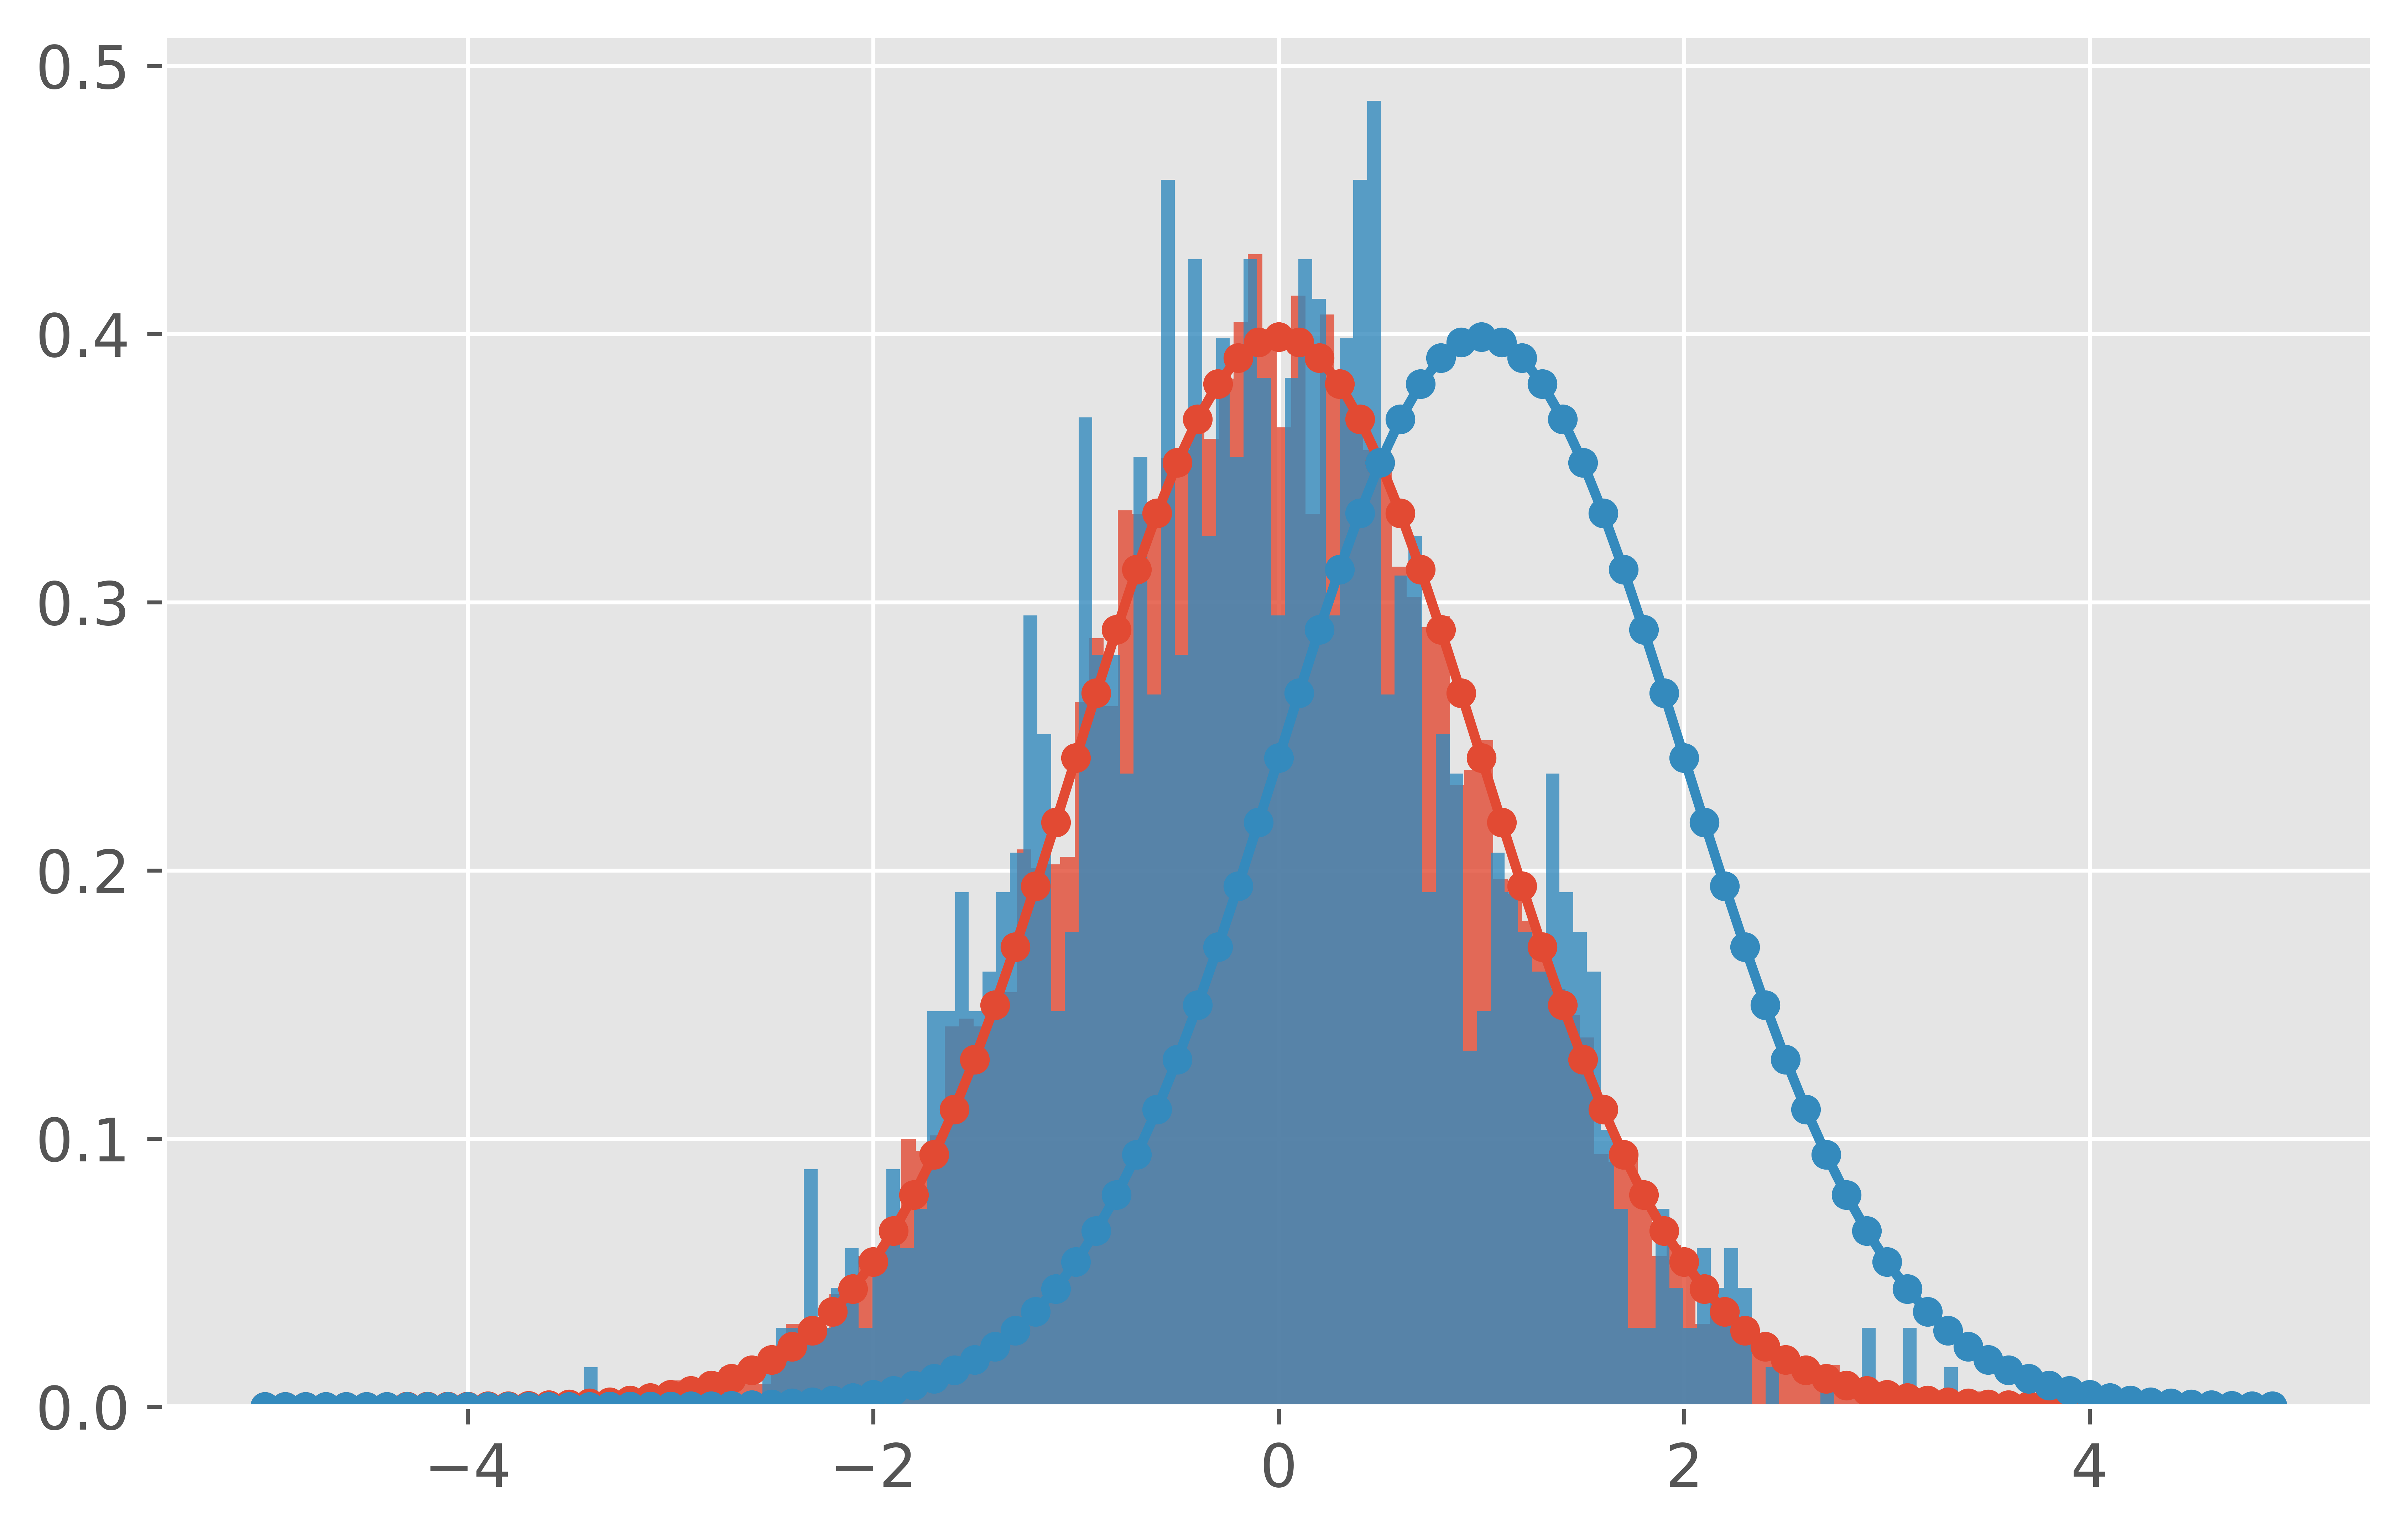

In [17]:
plt.style.use(plt.style.library['ggplot'])
plt.rcParams.update({'font.size': 12})
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.markersize'] = 10
fig, ax = plt.subplots(1, 1, figsize=(8,5), dpi=1000)
x = np.arange(100)/10 - 5
target_mu = 3
target_sigma = 1
values1 = pdf(x, 0, 1)
values2 = pdf(x, 1, 1)
samples = np.random.normal(0, 1, (10000))
weights = pdf(samples, 0, 1) / pdf(samples, 0, 1)
sum_weights = np.sum(weights)
new_samples = np.zeros((1000))
for j in range(1000):
    totalweight = 0
    # for i, sample in enumerate(samples):
    #     totalweight += weights[i]
    #     if np.random.rand() < weights[i]/totalweight:
    #         new_samples[j] = sample
    new_samples[j] = np.random.choice(samples, p=weights/sum_weights)

def histo(samples):
    num, edges = np.histogram(samples, bins=100)
    x = edges[:-1]
    width = edges[1:]-edges[:-1]
    area = np.sum(num * width)
    densities = num/area
    return x, densities, width 
ax.plot(x, values1, ".-", linewidth=2.0)
ax.plot(x, values2, ".-", linewidth=2.0)
preX, preDensity, preWidth  = histo(samples)
newX, newDensity, newWidth  = histo(new_samples)
ax.bar(preX, preDensity, preWidth, alpha=0.8)
ax.bar(newX, newDensity, newWidth, alpha=0.8)
# ax.plot(np.sort(samples), pdf(np.sort(samples), 1, 1), ".-", linewidth=2.0)